In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [5]:
# Chargeons les données
data = pd.read_csv("C:/Users/mfcho/OneDrive/Documents/Data Engeneering/projetpython2/france_total_real_estate_sales_2022.csv", 
                   dtype={'Commune': 'str', 'Code postal': 'str'}, 
                   low_memory=False)

In [6]:
# Afficher les 20 premières valeurs de la colonne 'Valeur fonciere'
print(data['Valeur fonciere'].head(20))

0      55000,00
1     143000,00
2     143000,00
3     143000,00
4        300,00
5     255000,00
6     255000,00
7     525000,00
8     525000,00
9     525000,00
10    254200,00
11     64000,00
12     64000,00
13    140000,00
14    140000,00
15    140000,00
16    140000,00
17    134000,00
18    134000,00
19    134000,00
Name: Valeur fonciere, dtype: object


In [7]:
# Remplacer les virgules par des points dans la colonne 'Valeur fonciere'
data['Valeur fonciere'] = data['Valeur fonciere'].str.replace(',', '.', regex=False)


# Convertir la colonne en numérique
data['Valeur fonciere'] = pd.to_numeric(data['Valeur fonciere'], errors='coerce')

# Vérifier si des NaN persistent
print("NaN après conversion dans 'Valeur fonciere':", data['Valeur fonciere'].isna().sum())

#des NaN persistent après la conversion, remplissons les avec la moyenne des valeurs.
data['Valeur fonciere'] = data['Valeur fonciere'].fillna(data['Valeur fonciere'].mean())

# Sélectionner les colonnes numériques uniquement pour le calcul des moyennes
numerical_features = ['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain']

# Remplir les NaN dans les colonnes numériques
for feature in numerical_features:
    data[feature] = data[feature].fillna(data[feature].mean())


NaN après conversion dans 'Valeur fonciere': 24721


In [8]:
 #Ajouter de nouvelles caractéristiques pour enrichir le modèle
data['Densite_bati'] = data['Surface reelle bati'] / data['Surface terrain']
data['Rapport_pieces_surface'] = data['Nombre pieces principales'] / data['Surface reelle bati']

In [9]:
# Vérifier si des NaN persistent
print("NaN après conversion dans 'Valeur fonciere':", data['Valeur fonciere'].isna().sum())

NaN après conversion dans 'Valeur fonciere': 0


In [10]:
# Sélectionner uniquement les colonnes numériques pour X
X = data[['Surface reelle bati', 'Nombre pieces principales', 'Surface terrain', 'Densite_bati', 'Rapport_pieces_surface']]

# Variable cible (Valeur fonciere)
y = data['Valeur fonciere']

In [11]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Vérifier les NaN dans les ensembles d'entraînement et de test
print("NaN dans X_train :", X_train.isna().sum().sum())
print("NaN dans y_train :", y_train.isna().sum())

NaN dans X_train : 809004
NaN dans y_train : 0


In [13]:
# Vérifier le pourcentage de valeurs manquantes dans chaque colonne
missing_values = X_train.isna().mean().sort_values(ascending=False)
print(missing_values)

Rapport_pieces_surface       2.658470e-01
Densite_bati                 9.858342e-07
Surface reelle bati          0.000000e+00
Nombre pieces principales    0.000000e+00
Surface terrain              0.000000e+00
dtype: float64


In [14]:
# Remplir les valeurs manquantes avec la moyenne des colonnes
X_train_cleaned = X_train.fillna(X_train.mean())


In [15]:
# Vérification des NaN après nettoyage
print("NaN après nettoyage dans X_train_cleaned :", X_train_cleaned.isna().sum().sum())


NaN après nettoyage dans X_train_cleaned : 0


In [16]:
# Combiner X_train_cleaned et y_train pour supprimer les lignes avec des NaN dans les deux
combined = pd.concat([X_train_cleaned, y_train], axis=1).dropna()

# Séparer à nouveau les caractéristiques et la cible
X_train_final = combined.drop(columns=['Valeur fonciere'])
y_train_final = combined['Valeur fonciere']

# Vérifier les dimensions pour s'assurer qu'elles correspondent
print(f"Taille de X_train_final: {X_train_final.shape}")
print(f"Taille de y_train_final: {y_train_final.shape}")


Taille de X_train_final: (3043108, 5)
Taille de y_train_final: (3043108,)


In [17]:
# Recréons l'ensemble d'entraînement et de test
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_train_final, y_train_final, test_size=0.2, random_state=42)

In [18]:
# Vérifier les NaN et les valeurs infinies dans X_train_final
print("NaN dans X_train_final :", X_train_final.isna().sum().sum())
print("Infinités dans X_train_final :", np.isinf(X_train_final).sum().sum())

# Vérifier les NaN et les valeurs infinies dans y_train_final
print("NaN dans y_train_final :", y_train_final.isna().sum())
print("Infinités dans y_train_final :", np.isinf(y_train_final).sum())


NaN dans X_train_final : 0
Infinités dans X_train_final : 44
NaN dans y_train_final : 0
Infinités dans y_train_final : 0


In [19]:
# Remplacer les valeurs infinies par NaN pour pouvoir les traiter
X_train_final.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remplir les NaN (anciennement inf) par la moyenne des colonnes
X_train_final = X_train_final.fillna(X_train_final.mean())


In [20]:
# Vérification post-traitement
print("Infinités après traitement dans X_train_final :", np.isinf(X_train_final).sum().sum())
print("NaN après traitement dans X_train_final :", X_train_final.isna().sum().sum())


Infinités après traitement dans X_train_final : 0
NaN après traitement dans X_train_final : 0


In [21]:
# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_final, y_train_final)

LinearRegression()

In [22]:
# Prédiction des valeurs foncières sur l'ensemble de test
y_pred = model.predict(X_train_final)

In [23]:
# Évaluation du modèle avec RMSE
# Calcul manuel du RMSE
rmse = np.sqrt(mean_squared_error(y_train_final, y_pred))
print(f"RMSE: {rmse}")

RMSE: 5969437.384987734


c:\Users\mfcho\OneDrive\Documents\Data Engeneering\projetpython2\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


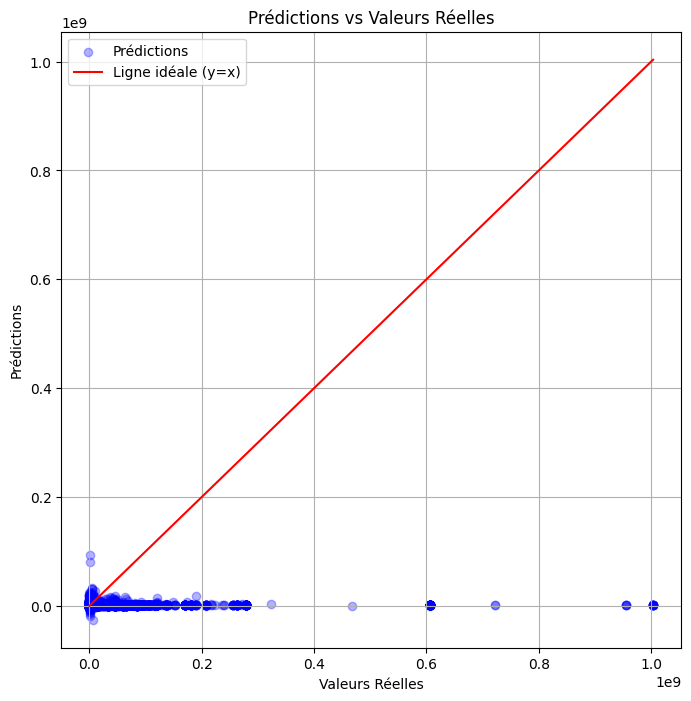

In [24]:
# Créer un graphique pour visualiser les prédictions vs les valeurs réelles
plt.figure(figsize=(8, 8))
plt.scatter(y_train_final, y_pred, alpha=0.3, label="Prédictions", color='blue')
plt.plot([min(y_train_final), max(y_train_final)], [min(y_train_final), max(y_train_final)], 
         color="red", label="Ligne idéale (y=x)")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs Réelles")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
# Créer et entraîner un modèle XGBoost
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train_final, y_train_final)

# Prédictions avec XGBoost
y_pred_xgb = xgb_model.predict(X_test_final)

# Évaluation du modèle XGBoost avec RMSE
# Calcul manuel du RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test_final, y_pred_xgb))
print(f"RMSE avec XGBoost: {rmse_xgb}")

RMSE avec XGBoost: 5435926.695802487


In [27]:
# Vérifions les dimensions des deux séries
print(f"Dimension de y_test_final : {len(y_test_final)}")
print(f"Dimension de y_pred : {len(y_pred)}")


Dimension de y_test_final : 608622
Dimension de y_pred : 2434486


In [28]:
# Vérifions la taille de X_test_final
print(f"Dimension de X_test_final : {len(X_test_final)}")

Dimension de X_test_final : 608622


In [29]:
# Assurons-nous que le processus de création des ensembles est cohérent

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_train_final, y_train_final, test_size=0.2, random_state=42
)

In [30]:
# Reprenons la prédiction
y_pred = model.predict(X_test_final)


In [31]:
# verifions à nouveau les dimensions 
print(f"Dimension recalculée de y_pred : {len(y_pred)}")


Dimension recalculée de y_pred : 486898


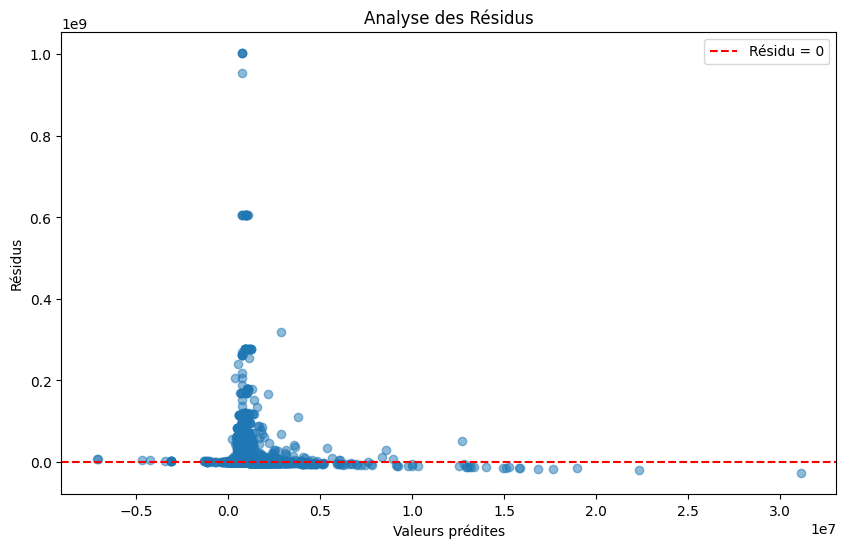

In [32]:
# Visualisons les résidus
import matplotlib.pyplot as plt
residuals = y_test_final - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', label='Résidu = 0')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Analyse des Résidus")
plt.legend()
plt.show()

In [33]:
# Remplacons les infinis par NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remplacons les NaN par la moyenne de chaque colonne
X = X.fillna(X.mean())

# Vérification finale
print("Infinités dans X :", np.isinf(X).sum().sum())
print("NaN dans X :", X.isna().sum().sum())


C:\Users\mfcho\AppData\Local\Temp\ipykernel_21272\4089670207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


Infinités dans X : 0
NaN dans X : 0


In [34]:
# Limitons les valeurs à un certain seuil
threshold = 1e6  # Exemple : 1 million
X = X.clip(lower=-threshold, upper=threshold)


In [35]:
from sklearn.preprocessing import MinMaxScaler
#Normalisation des données
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
# Mise à jour des ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Optimisation des Hyperparamètres avec GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Définissons une grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


In [47]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.0.2 

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
  Using cached scikit_learn-1.0.2-cp39-cp39-win_amd64.whl.metadata (10 kB)
Using cached scikit_learn-1.0.2-cp39-cp39-win_amd64.whl (7.2 MB)


In [48]:
xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
       

In [49]:
# Meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)
best_model = grid_search.best_estimator_

Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}


In [58]:
# Réentraîner le modèle avec les meilleurs hyperparamètres
best_model = XGBRegressor(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=150,
    random_state=42
)
best_model.fit(X_train_final, y_train_final)

# Prédiction sur l'ensemble de test
y_pred_best = best_model.predict(X_test_final)

# Évaluation du RMSE
rmse_best = mean_squared_error(y_test_final, y_pred_best, squared=False)
print(f"RMSE avec les meilleurs hyperparamètres : {rmse_best}")


RMSE avec les meilleurs hyperparamètres : 5856234.5074183205


# Réseaux de Neurones avec Keras

In [50]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définir le modèle
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Couche de sortie pour la prédiction
])

# Compiler le modèle
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entraîner le modèle
history = model_nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)


Epoch 1/50


c:\Users\mfcho\OneDrive\Documents\Data Engeneering\projetpython2\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95098/95098 ━━━━━━━━━━━━━━━━━━━━ 183s 2ms/step - loss: 33574042468352.0000 - mae: 795338.3125 - val_loss: 31051556585472.0000 - val_mae: 933958.3750
Epoch 2/50
95098/95098 ━━━━━━━━━━━━━━━━━━━━ 312s 3ms/step - loss: 36348538912768.0000 - mae: 931282.3125 - val_loss: 31049144860672.0000 - val_mae: 925612.9375
Epoch 3/50
95098/95098 ━━━━━━━━━━━━━━━━━━━━ 499s 5ms/step - loss: 35566750007296.0000 - mae: 930340.6875 - val_loss: 31046569558016.0000 - val_mae: 935832.0625
Epoch 4/50
95098/95098 ━━━━━━━━━━━━━━━━━━━━ 516s 5ms/step - loss: 33630202101760.0000 - mae: 922926.0000 - val_loss: 31044396908544.0000 - val_mae: 924857.1250
Epoch 5/50
95098/95098 ━━━━━━━━━━━━━━━━━━━━ 465s 5ms/step - loss: 31483131592704.0000 - mae: 920486.3750 - val_loss: 31042085847040.0000 - val_mae: 933283.6250
Epoch 6/50
95098/95098 ━━━━━━━━━━━━━━━━━━━━ 549s 6ms/step - loss: 38563768958976.0000 - mae: 939266.8125 - val_loss: 31040001277952.0000 - val_mae: 934020.0625
Epoch 7/50
95098/95098 ━━━━━━━━━━━━━━━━━━━━ 420s 4m

In [55]:
# Évaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_final)

# Calcul des métriques
mse = mean_squared_error(y_test_final, y_pred)
rmse = mean_squared_error(y_test_final, y_pred, squared=False)
mae = mean_absolute_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")


MSE: 39305231611151.66
RMSE: 6269388.455914313
MAE: 938375.6608922073
R2 Score: 0.0009173431332136772


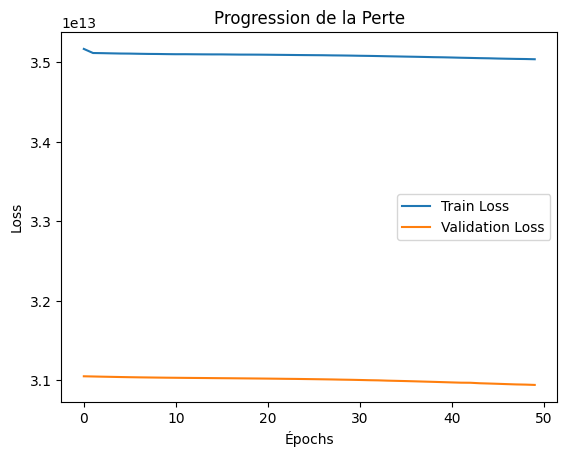

In [56]:
#Visualisation des performances
import matplotlib.pyplot as plt

# Courbe de perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Progression de la Perte')
plt.show()


c:\Users\mfcho\OneDrive\Documents\Data Engeneering\projetpython2\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


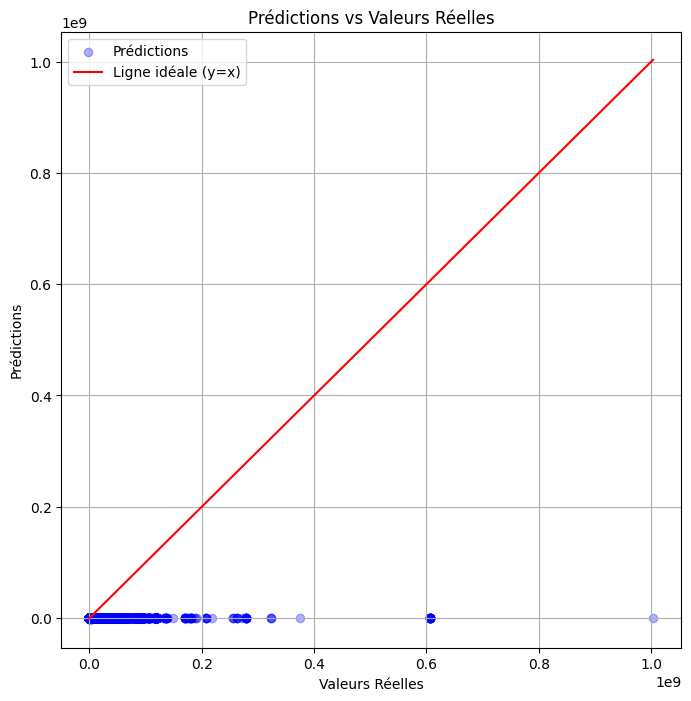

In [57]:
# Prédictions
y_pred = model.predict(X_test)

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.3, label="Prédictions", color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", label="Ligne idéale (y=x)")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs Réelles")
plt.legend()
plt.grid(True)
plt.show()


# Comparaison des Modèles

In [52]:
from sklearn.metrics import mean_squared_error

# Évaluer XGBoost
y_pred_xgb = best_model.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

# Évaluer le Réseau de Neurones
y_pred_nn = model_nn.predict(X_test).flatten()
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)

print(f"RMSE - XGBoost : {rmse_xgb}")
print(f"RMSE - Réseau de Neurones : {rmse_nn}")


23775/23775 ━━━━━━━━━━━━━━━━━━━━ 18s 757us/step
RMSE - XGBoost : 5201493.536835477
RMSE - Réseau de Neurones : 5562638.600557442


## Visualisation des Résultats

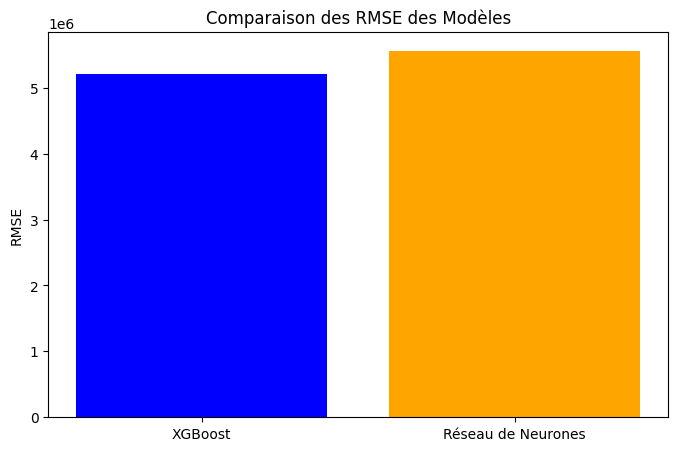

In [53]:
# Graphique comparatif des RMSE
models = ['XGBoost', 'Réseau de Neurones']
rmse_values = [rmse_xgb, rmse_nn]

plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=['blue', 'orange'])
plt.title("Comparaison des RMSE des Modèles")
plt.ylabel("RMSE")
plt.show()
